- <https://stackabuse.com/introduction-to-image-processing-in-python-with-opencv/>


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pathlib import Path

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

DARK_READER = True
if DARK_READER:
    plt.rcParams.update({
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "lightgray",
        "axes.labelcolor": "white",
        "axes.titlecolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "lightgray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black",
    })

In [4]:
def imshow(image):
    #print(image.ndim)
    plt.figure(figsize=(10, 10))
    if image.ndim == 3:
        plt.imshow(image[...,::-1])
    elif image.ndim == 2:
        plt.imshow(image, cmap="gray")
    #plt.show()

In [5]:
gray_rose = cv2.imread(str(Path.home()/"downloads/rose.png"), cv2.IMREAD_GRAYSCALE)
type(gray_rose)

numpy.ndarray

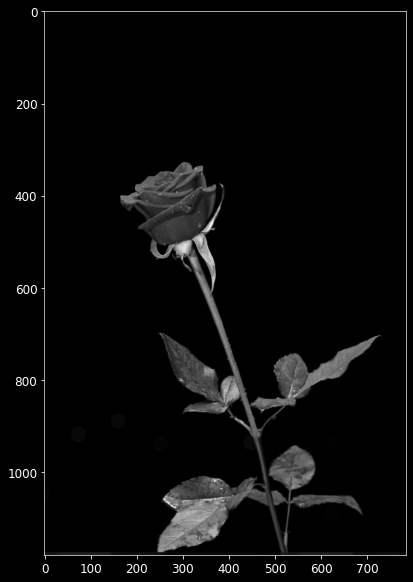

In [6]:
imshow(gray_rose)

In [7]:
for i in gray_rose.shape:
    print(i)

1180
786


In [8]:
type(np.ceil(1.3))

numpy.float64

In [9]:
np.ceil(1.3).astype(np.int64)

2

In [10]:
[np.random.randint(0, i - 1, int(10)) for i in gray_rose.shape]

[array([  98,  790,  572,  612,  499,  684,   15,  149, 1142,  510]),
 array([ 64,  90, 293, 714, 261, 406, 276, 533, 636, 724])]

In [11]:
def salt_pepper(image, proba):
      row, col = image.shape

      # Declare salt & pepper noise ratio
      salt_percentage = .5
      output = np.copy(image)

      # Apply salt noise
      num_salt = np.ceil(proba * image.size * salt_percentage).astype(np.int64)
      coords = [np.random.randint(0, i, num_salt) for i in image.shape]
      output[coords] = 1

      # Apply pepper noise
      num_pepper = np.ceil(proba * image.size * (1 - salt_percentage)).astype(np.int64)
      coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
      output[coords] = 0

      return output

/home/phunc20/.virtualenvs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/home/phunc20/.virtualenvs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


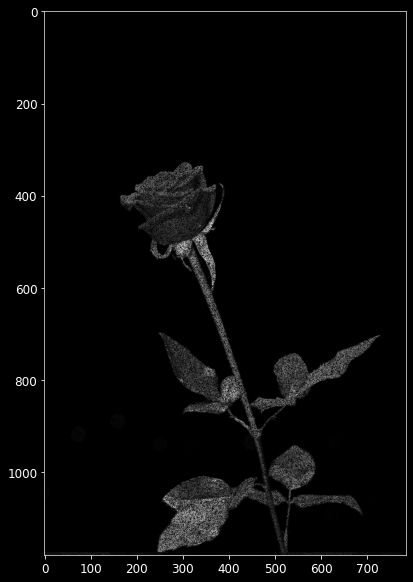

In [12]:
sp_rose = salt_pepper(gray_rose, 0.45)
imshow(sp_rose)

In [13]:
def contraharmonic_mean(img, size, Q):
    num = np.power(img, Q + 1)
    denom = np.power(img, Q)
    kernel = np.full(size, 1.0)
    result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
    return result

/home/phunc20/.virtualenvs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


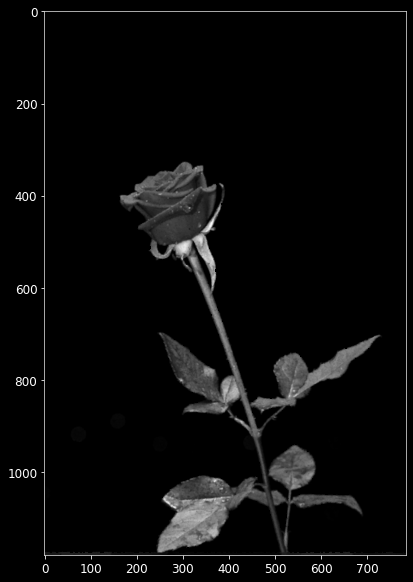

In [14]:
imshow(contraharmonic_mean(sp_rose, (3,3), 0.5))